# Week 6 – Chaos and Strange Attractors

### Aim: Work through lectures 17–20 and ch. 3 of the OOP module.

#### Schedule w/c 12th July

Monday – Lecture 17 + exercises

Tuesday – Ch. 3 of the OOP module + *The Misbehaviour of Markets*

Wednesday – Lecture 18 + exercises

Thursday – Lecture 19 + exercises

Friday – X

Saturday – Weekly blog post

Sunday – Lecture 20 + notebook uploaded to GitHub

In [23]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import slicc_tools as st

## Lecture 17 – Chaos in the Lorenz Equations

### Global Stability of the Origin (p. 323–324)

Last time we remarked that for $r < 1$ the origin is linearly stable. This can also be shown to be the case globally using a *Lyapunov function*:

Define $V(x, y, z) = \frac{1}{\sigma} x^2 + y^2 + z^2$ which is analogical to the energy function of a dissipative system.

$\Rightarrow V$ decreases along trajectories. The surfaces of constant $V$ are concentric ellipsoids.

Note: There is no recipe for finding Lyapunov functions apart from algebraic trial and error.
\
\
\
We now have to show that $\frac{dV}{dt} < 0$ if $r < 1$ and $(x, y, z) \neq (0, 0, 0)$.

$\frac{1}{2} \dot V = \frac{1}{\sigma} x \dot x + y \dot y + z \dot z$ into which we substitute the Lorenz equations:

$\dot x = \sigma (y - x)$

$\dot y = rx - y - xz$

$\dot z = xy - bz$

And we get $\frac{1}{2} \dot V = \left( yx - x^2 \right) + \left( ryx - y^2 - xzy \right) + \left( zxy - bz^2 \right) = (r+1)xy - x^2 - y^2 - bz^2$ where we have to complete the square.

$\Rightarrow \frac{1}{2} \dot V = - \left[ x - \frac{r+1}{2}y \right]^2 - \left[ 1 - \left( \frac{r+1}{2} \right)^2 \right] y^2 - bz^2 \leq 0$ for $r < 1$.

We can see that $\dot V = 0$ only for $(x, y, z) = (0, 0, 0)$, so the origin is globally stable for $r < 1$.

### Stability of C$^+$ and C$^-$ (p. 324–325)

Suppose $r > 1$. C$^+$ and C$^-$ are then linearly stable for $1 < r < r_{H} = \frac{\sigma(\sigma + b + 3}{\sigma - b - 1}$ where $r_H$ is a parameter value at which a Hopf bifurcation occrs.
> Here we assume $\sigma - b - 1 > 0$ where the parameter values used by Lorenz are $\sigma = 10, b = \frac{8}{3}$.

For Lorenz's values $r_H \approx 24.74$. At this point a *subcritical* Hopf bifurcation occurs.
> The trajectories cannot be repelled out to infinity (Exercise 9.2.2) nor can they be quasiperiodic.

### Exponential Divergence of Nearby Trajectories (p. 328–331)

Suppose $\underline{x}(t)$ and $\underline{x}(t) + \underline{\delta}(t)$ are two neighbouring trajectories in the Lorenz system. Then $\delta (t) \approx \delta_0 e^{\lambda t}$ where $\lambda \approx 0.9$.
> $\lambda$ is the largest of the n *Lyapunov exponents* of an n-dimensional system (Complexity Explorer course).

A positive Lyapunov exponent is a characteristic of chaos.

For a tolerance $a$, a prediction of the system's behaviour becomes intolerable when $|\delta (t) | > a$.

Solving for $t$, we get the *predictability horizon* (Lyapunov time): $t \approx \frac{1}{\lambda} \ln{ \frac{a}{|\delta_0|}}$.

**Next Actions**:
- Finish exercise ~8.1.15~
- Do exercises ~9.3.2–7~ (Lorenz system), ~9.3.9~ (exponential divergence) and ~9.3.10~ (time horizon).

### Numerical Experiments with the Lorenz System (9.3.2–7)

In [37]:
#Define the governing equations of the Lorenz system
def lorenz(v, r, sigma, b):
    x, y, z = v[0], v[1], v[2]
    
    x_deriv = sigma * (y - x)
    y_deriv = r*x - y - x*z
    z_deriv = x*y - b*z
    
    return np.array([x_deriv, y_deriv, z_deriv])

#Define a function that plots the required Lorenz system graphs for a given parameter r
def plot_lorenz(r, t, sigma = 10, b = 8/3, time_step = 0.01, transient = 0, v = [0, 1, 0], c = 'b'):
    '''
    Plots three different graphs of the Lorenz system with the given arguments:
    r = the Rayleigh number
    t = length of time for which the graphs are plotted
    sigma = the Prandtl number; defaults to 10
    b = the value of parameter b; defaults to 8/3
    time_step = length of a single time step used for graphing; defaults to 0.01
    transient = duration deleted from the beginning of a graph to remove a transient
    v = initial condition in (x, y, z) format; defaults to (0, 1, 0)
    c = colour of the plot
    '''
    
    #Create lists of the xyz and time values
    dim_values = [[], [], []]
    t_values = []
    
    #Define the Lorenz equations with fixed parameters
    def lorenz_var(v):
        return lorenz(v, r = r, sigma = sigma, b = b)
    
    #Declare initial condition
    v = [0, 1, 0]
    
    #Iterate over time steps
    for step in np.arange(0, t, time_step):
        t_values.append(step)
        
        #Add new values of (x, y, z) to the list dim_values
        for m in range(3):
            dim_values[m].append(v[m])
     
        v[0], v[1], v[2] = st.runge_kutta(v, lorenz_var, dt = time_step)
    
    #Format plot
    fig, ax = plt.subplots(3, 1, figsize = (15, 20))
    
    #Calculate number of transient points to remove
    num = int(transient / time_step)
    
    #Plot x vs. t
    ax[0].plot(t_values[num:], dim_values[0][num:], color = c)
    ax[0].axhline(y=0, color='k', linewidth=1)
    ax[0].set_xlabel(r'$t$')
    ax[0].set_ylabel(r'$x$')

    #Plot y vs. t
    ax[1].plot(t_values[num:], dim_values[1][num:], color = c)
    ax[1].axhline(y=0, color='k', linewidth=1)
    ax[1].set_xlabel(r'$t$')
    ax[1].set_ylabel(r'$y$')

    #Plot z vs. x
    ax[2].plot(dim_values[2][num:], dim_values[0][num:], color = c)
    ax[2].axhline(y=0, color='k', linewidth=1)
    ax[2].set_xlabel(r'$x$')
    ax[2].set_ylabel(r'$z$')

    plt.show()

**Exercise 9.3.2**

$r = 10$

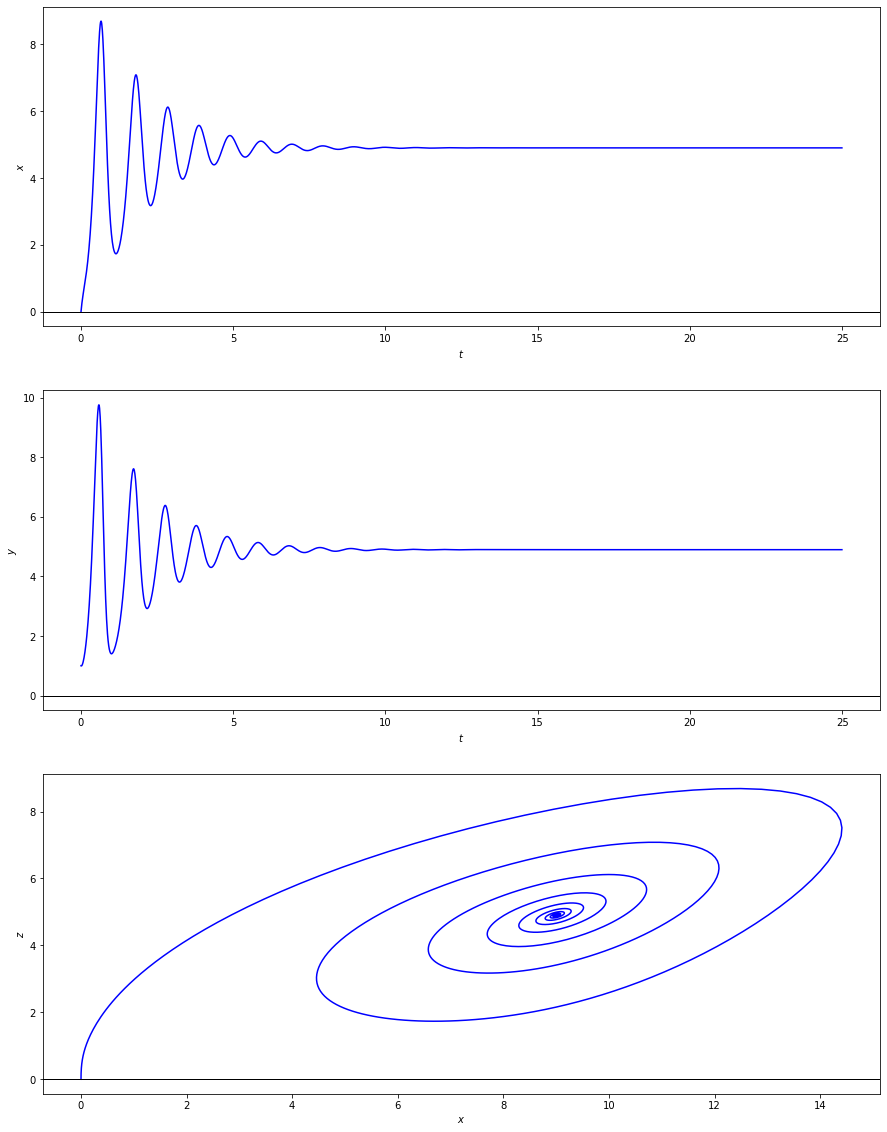

In [39]:
plot_lorenz(10, 25)

**Exercise 9.3.3**

$r = 22$ (transient chaos)

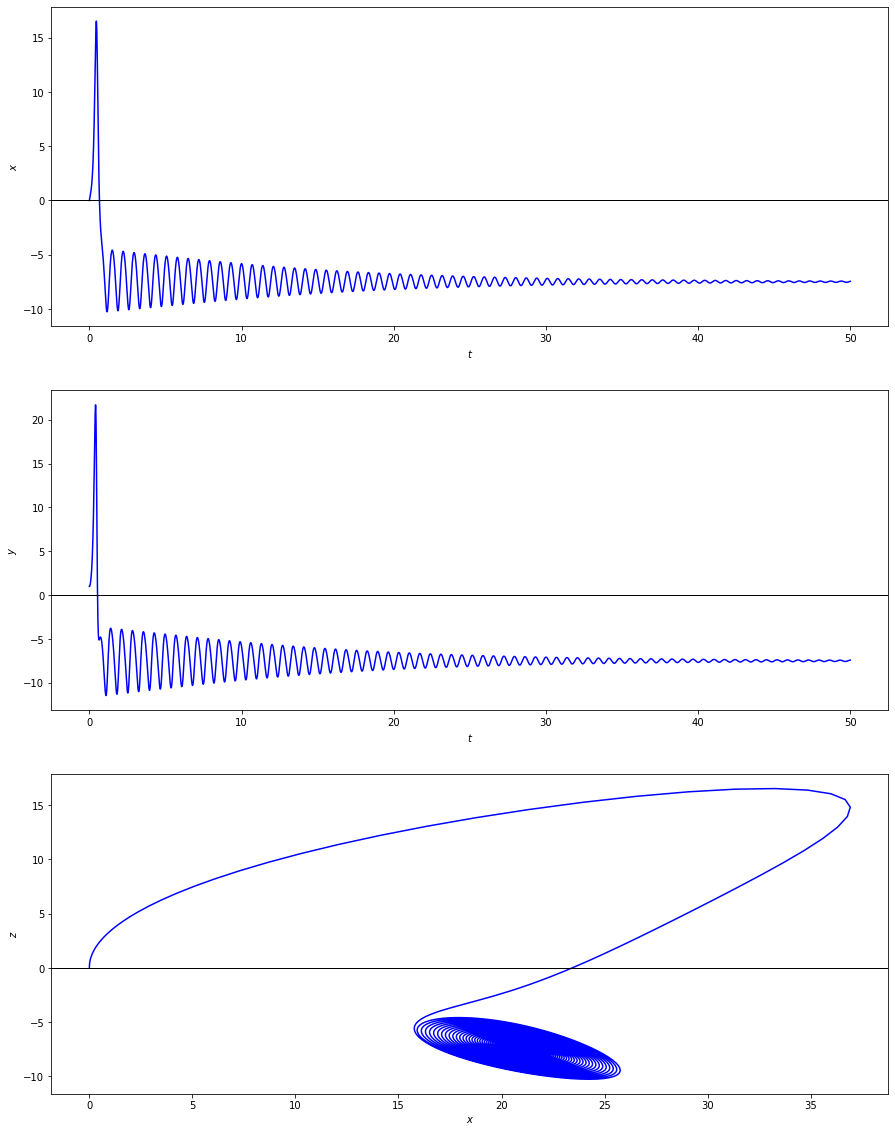

In [60]:
plot_lorenz(22, 50)

**Exercise 9.3.4**

$r = 24.5$ (chaos and stable point co-exist)

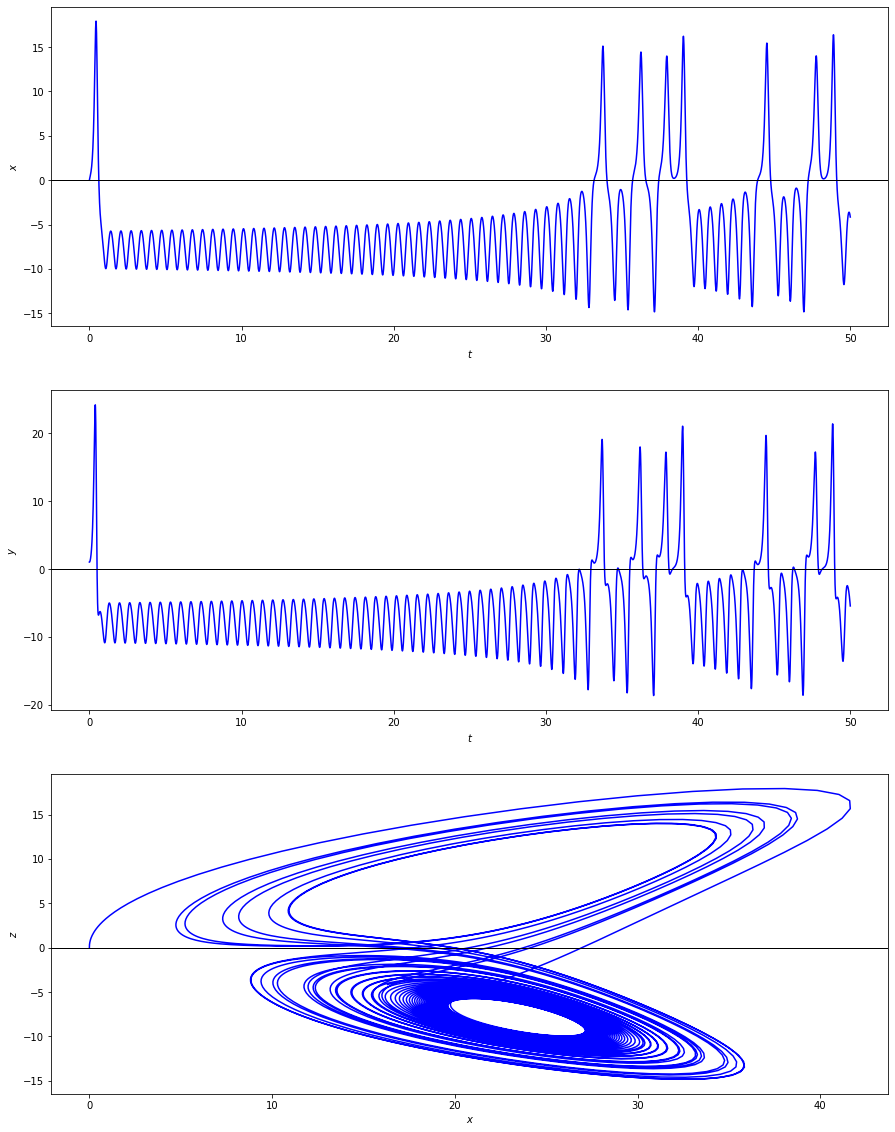

In [40]:
plot_lorenz(24.5, 50)

**Exercise 9.3.5**

$r = 100$ (surprise)

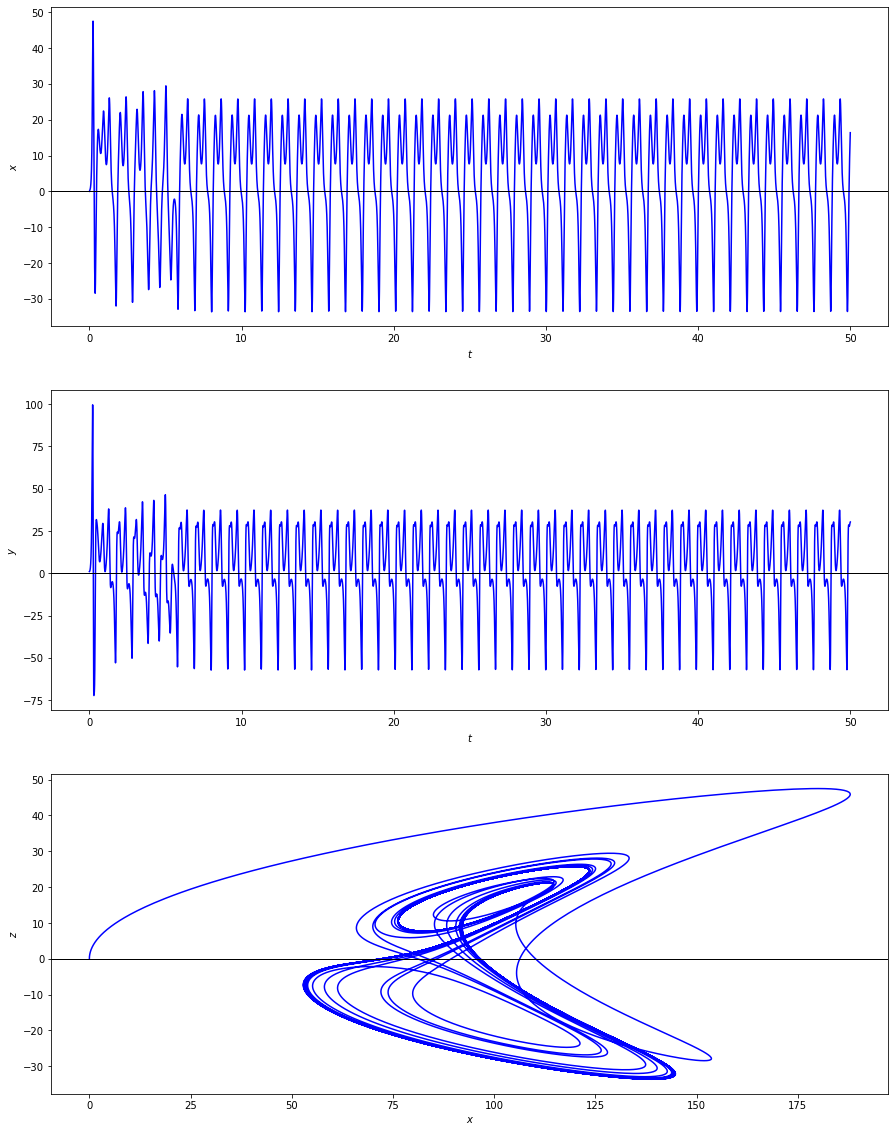

In [67]:
plot_lorenz(100, 50, time_step = 0.001)

**Exercise 9.3.6**

$r = 126.52$

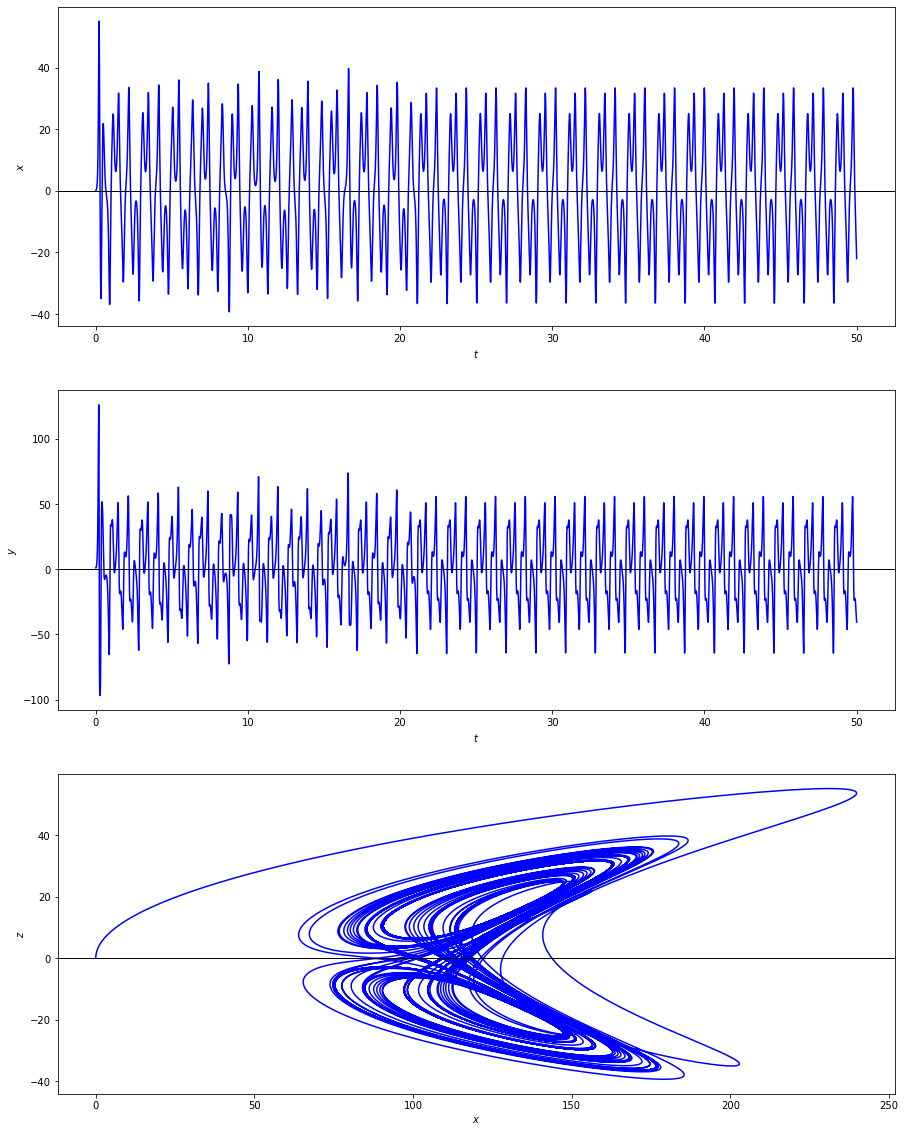

In [64]:
plot_lorenz(126.52, 50, time_step = 0.001)

**Exercise 9.3.7**

$r = 400$

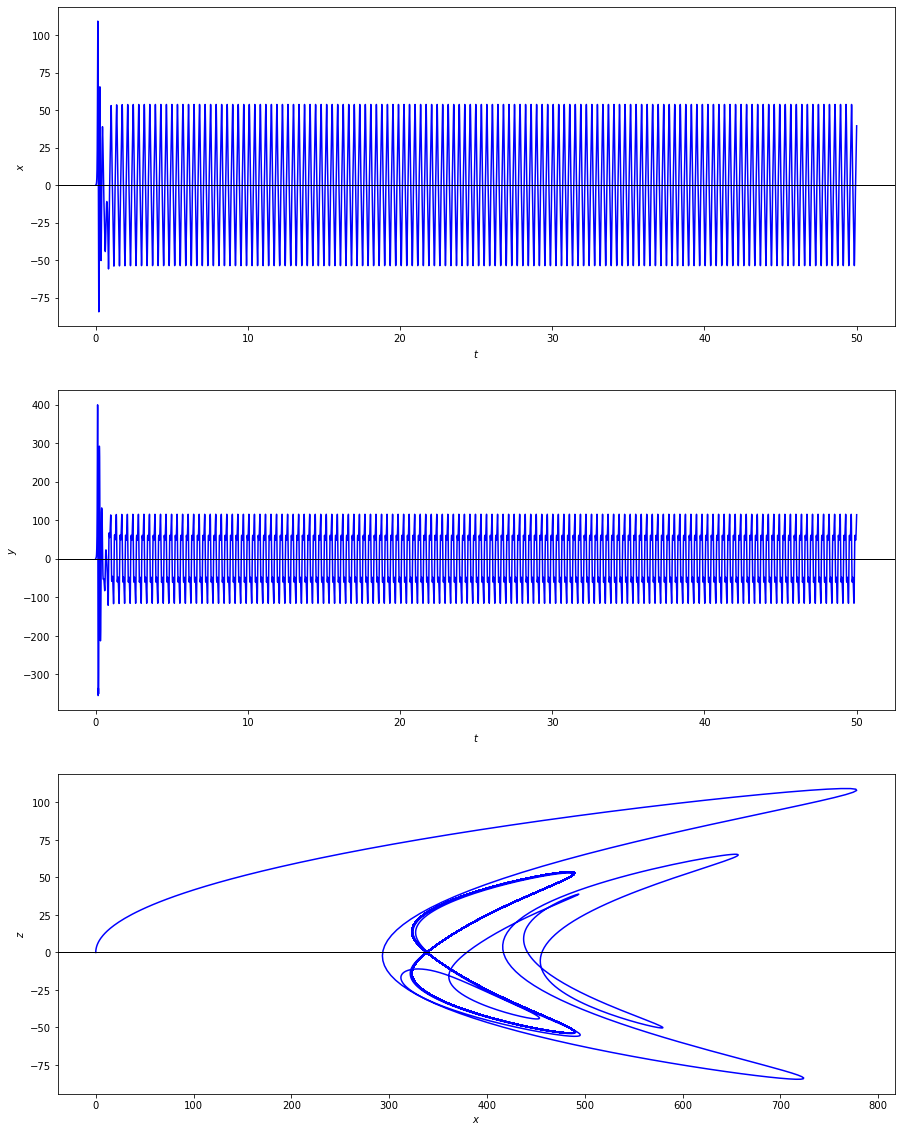

In [63]:
plot_lorenz(400, 50, time_step = 0.001)

The plot_lorenz function written for these exercises could be added in an amended format to the slicc_tools module.

## Lecture 18 – Strange Attractor for the Lorenz Equations

**Motivation**:

We  still don't know (in the context of this course) whether the Lorenz system has a strange attractor or simply a stable limit cycle with a very long transient.

### Rough Definitions

**Chaos**: <u>Aperiodic</u> <u>long-term</u> behaviour in a deterministic system that exhibits <u>sensitive dependence on initial condition</u> (positive Lyapunov exponent)

**Attractor**:
1) Invariant set (start in $A$, stay in $A$)

2) Attracts an open set of initial conditions

3) No proper subset of $A$ satisfies both 1 and 2

4) Some authors also require that trajectories that start near $A$ stay near $A$ for all $t > 0$

**Strange Attractor**: Attractor that exhibits sensitive dependence on initial conditions (has a *fractal* nature)

### Dynamics on the Lorenz Attractor (ch. 9.4)

The Lorenz attractor can be reduced to a 1D map.

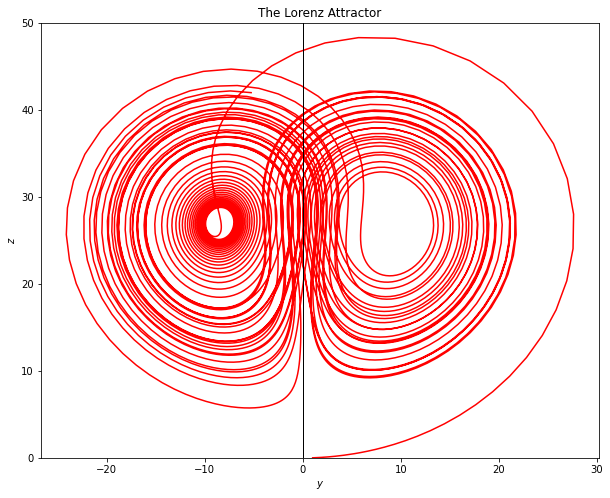

In [25]:
#Retrieve (x, y, z) and t values from slicc_tools function lorenz_values
dim_values, t_values = st.lorenz_values(28, 10, 8/3, 50)

x_values = dim_values[0]
y_values = dim_values[1]
z_values = dim_values[2]

#Format figure
plt.figure(figsize=(10, 8))

#Plot the Lorenz attractor in z vs. y
plt.plot(y_values, z_values, c = 'r')

plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)

plt.title('The Lorenz Attractor')

plt.xlabel(r'$y$')
plt.ylabel(r'$z$')

plt.ylim(0, 50)

plt.show()

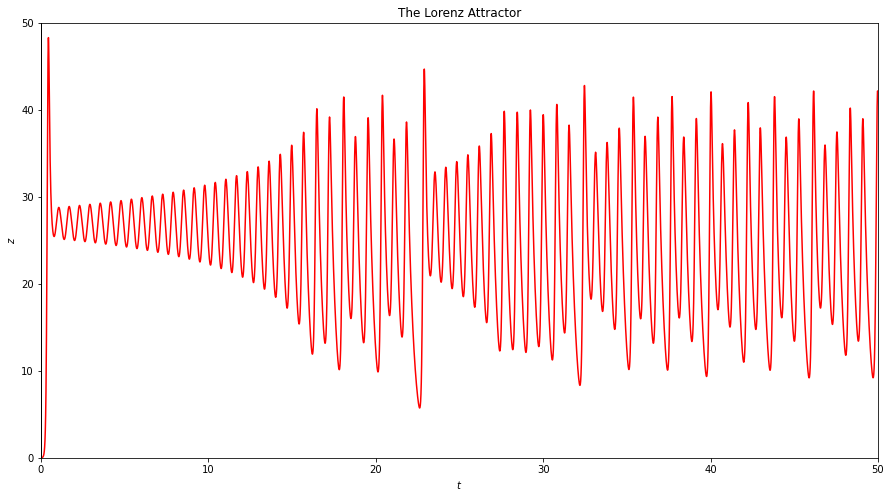

In [26]:
#Format figure
plt.figure(figsize=(15, 8))

#Plot the waveform of the above is z vs. t
plt.plot(t_values, z_values, c = 'r')

plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)

plt.title('The Lorenz Attractor')

plt.xlabel(r'$t$')
plt.ylabel(r'$z$')

plt.xlim(0, 50)
plt.ylim(0, 50)

plt.show()

Lorenz's idea was that the local maximum $z_n$ should predict $z_{n+1} \Rightarrow$ *Lorenz Map* (p. 334–335).

Key observation from the $z_{n+1}$ vs. $z_n$ map: the function $z_{n+1} = f \left( z_n \right)$ satisfies the condition $|f' \left( z \right)| > 1 \forall z$.

The map has one fixed point $f \left( z^* \right) = z^*$ representing a closed orbit in the form of figure-of-eight.

We can show that the closed orbit is stable by inspecting a perturbed trajectory with $z_n = z^* + \eta_n$.

Then $f \left( z_n \right) = f \left( z^* + \eta_n \right) = f \left( z^* \right) + \eta_n f' \left( z^* \right) + O \left( \eta_n^2 \right)$, so $\eta_{n+1} \approx f' \left( z^* \right) \eta_n$.

Since $|f' \left( z \right)| > 1 \forall z$, $| \eta_{n+1}| > | \eta_n |$, so the deviation grows with each iteration and the closed orbit is unstable.

See **Example 9.4.1** for a generalised "proof" showing that all closed orbits of the system must be unstable.

### Cobwed Diagrams (ch. 10.1)

These will be returned to in the lecture on one-dimensional iterated maps.

Cobwed diagrams can also be explored in the context of the logistic map in this [Complexity Explorer applet](https://www.complexityexplorer.org/explore/interactive-apps/logistic-map-app).

**Exercise 9.3.9** Exponential Divergence in the Lorenz System

We can compare two neighbouring trajectories $\underline{x}(t)$ and $\underline{x}(t) + \underline{\delta}(t)$, iterating the system up to time $t$ at which point the largest Lyapunov exponent is given by $\lambda = \frac{1}{t} \ln{\left|\frac{\underline{\delta}(t)}{\underline{\delta}_0}\right|}$ where $\left| \underline{\delta}(t) \right| = \sqrt{\delta_x^2 + \delta_y^2 + \delta_z^2}$ is the magnitude of the separation vector.

This can also be represented as a linear relationship: $\ln{\left| \underline{\delta}(t) \right|} = \lambda t + \ln{\left| \underline{\delta}_0 \right|}$.

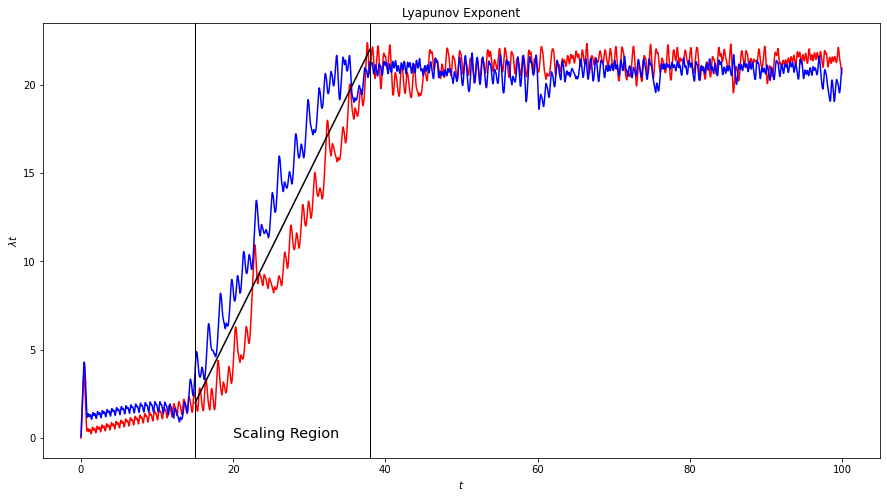

In [78]:
#Declare four different initial conditions
x_0 = [0, 1, 0]
delta_0 = [0, 1e-8, 0]
x_d = [sum(x) for x in zip(x_0, delta_0)]

x_1 = [0.5, 0, 0.5]
delta_1 = [1e-8, 1e-8, 1e-8]
x_p = [sum(x) for x in zip(x_1, delta_1)]

#Assign the values from lorenz_values to pairs of lists
dim_1, t_1 = st.lorenz_values(28, 10, 8/3, 100, v_0 = x_0)
dim_2, t_2 = st.lorenz_values(28, 10, 8/3, 100, v_0 = x_d)

dim_3, t_3 = st.lorenz_values(28, 10, 8/3, 100, v_0 = x_1)
dim_4, t_4 = st.lorenz_values(28, 10, 8/3, 100, v_0 = x_p)


def lyapunov(tra_1, tra_2, delta_0, n):
    '''
    Returns time * the Lyapunov exponent of a system at a given time with the arguments:
    tra_1, tra_2 = coordinate values of two trajectories
    delta_0 = initial separation vector
    n = the nth iteration for which the Lyapunov exponent is calculated
    '''
    
    #Calculate the delta vector at a given point in time / n
    delta_t = [tra_1[m][n] - tra_2[m][n] for m in range(3)]

    #Calculate the absolute values of the two deltas
    d_0 = np.sqrt(sum(delta_0[m]**2 for m in range(3)))
    d_t = np.sqrt(sum(delta_t[m]**2 for m in range(3)))

    #Return t * Lyapunov
    lyapunov = np.log(d_t/d_0)
    
    return lyapunov


def lyapunov_exponents(tra_1, tra_2, delta_0, n):
    '''
    Returns the Lyapunov exponents for a given number of iterations
    '''

    #Create empty list to hold the Lyapunov exponents
    lyapunov_exponents = []

    for m in range(1, n):
        lyapunov_exponents.append(lyapunov(tra_1, tra_2, delta_0, m))

    return lyapunov_exponents


#Format figure
plt.figure(figsize=(15, 8))
plt.title('Lyapunov Exponent')
plt.xlabel(r'$t$')
plt.ylabel(r'$\lambda t$')


#Plot two graphs of the time development of the Lyapunov exponents
plt.plot(t_1[1:10000], lyapunov_exponents(dim_1, dim_2, delta_0, 10000), c = 'r')
plt.plot(t_3[1:10000], lyapunov_exponents(dim_3, dim_4, delta_1, 10000), c = 'b')

#Add line to approximate the slope in the scaling region = lambda
plt.plot([15, 38], [2, 22], c = 'k')

#Add scaling region lines
plt.axvline(x=15, color='k', linewidth=1)
plt.axvline(x=38, color='k', linewidth=1)
plt.text(20, 0, 'Scaling Region', size = 'x-large')

plt.show()

The graph fitting yields the value $\lambda = \frac{22 - 2}{38 - 15} \approx 0.87$ which is fairly close to the value ($\lambda \approx 0.9$) quoted by Strogatz.

This approach to estimating the largest Lyapunov exponent of the system is similar to that introduced in ch. 9 of Elizabeth Bradley's Complexity Explorer course [Nonlinear Dynamics: Mathematical and Computational Approaches](https://www.complexityexplorer.org/courses/115-nonlinear-dynamics-mathematical-and-computational-approaches).

**Exercise 9.3.10**: Time Horizon

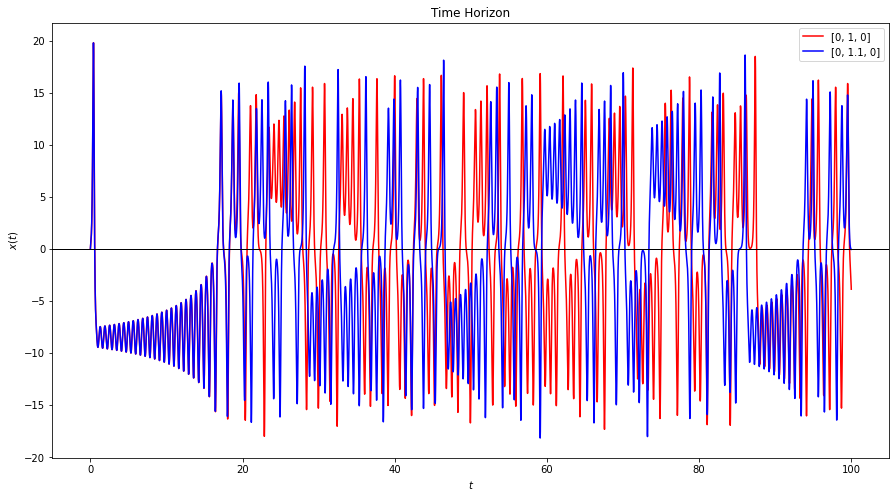

In [63]:
plt.figure(figsize=(15, 8))

#Plot two sets of x data in red and blue
plt.plot(t_1, dim_1[0], c = 'r', label=str(x_0))
plt.plot(t_2, dim_2[0], c = 'b', label=str(x_d))

#Add labels with initial conditions
plt.legend()

plt.axhline(y=0, color='k', linewidth=1)

plt.title('Time Horizon')
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')

plt.show()

**Next Actions**:
- ~Watch [Lecture 19 – One-Dimensional Maps](https://www.youtube.com/watch?v=pqJL_K2sS3Y&list=PLbN57C5Zdl6j_qJA-pARJnKsmROzPnO9V&index=19)~
- ~Identify 2–3 more challenging exercises relating to this week's topic~
- Read $\to$ p. 197 of *The Misbehaviour of Markets*

## Lecture 19 – One-Dimensional Maps (ch. 10)

Dynamical systems in which time is *discrete* (instead of continuous) can be modelled with recursive functions of the form $x_{n+1} = f \left( x_n \right)$.
> The resulting 1D maps act as a simpler models / examples of chaos.

### Logistic Map (ch. 10.2 & 10.3)

The logistic equation: $x_{n+1} = r x_n \left( 1 - x_n \right)$ where $0 \leq r \leq 4$.
> Arguably the simplest nonlinear map with quadratic nonlinearity.

See: Robert May (1976) *Nature* **261**, 459

Enter the value of parameter r: 3.5


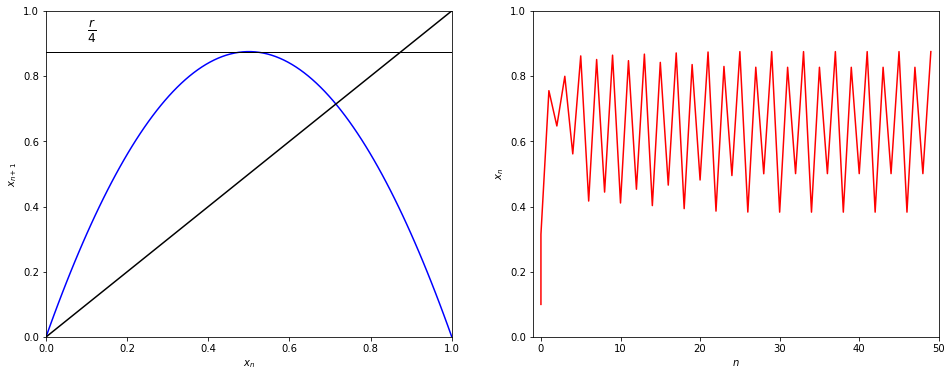

In [19]:
#Define the logistic equation
def logistic(r, x):
    return r * x * (1 - x)

#Format figure
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

#Declare value of parameter r
r = float(input('Enter the value of parameter r: '))


#Create list of x values for plotting
x_n = np.linspace(0, 1, 100)

#Plot x_n+1 vs x_n
ax[0].plot(x_n, logistic(r, x_n), c = 'b')

#Add horizontal line at r/4
ax[0].axhline(y=r/4, color='k', linewidth=1)
ax[0].text(0.1, r/4 + 0.05, r'$\frac{r}{4}$', size = 'xx-large')

#Add a diagonal line
ax[0].plot([0, 1], [0, 1], c = 'k')

ax[0].set_xlim(0, 1)
ax[0].set_ylim(0, 1)

ax[0].set_xlabel(r'$x_n$')
ax[0].set_ylabel(r'$x_{n+1}$')


#Plot time series of the logistic equation
x, t = [0.1], [0]

for n in range(50):
    x.append(logistic(r, x[-1]))
    t.append(n)

ax[1].plot(t, x, c = 'r')

ax[1].set_xlim(-1, 50)
ax[1].set_ylim(0, 1)

ax[1].set_xlabel(r'$n$')
ax[1].set_ylabel(r'$x_n$')


plt.show()

Using the above piece of code, we can explore the behaviour of the logistic equation for different values of $r$, especially the successive bifurcations (*period doublings*) in the intervals $\left[2.8, 3.3\right]$ and $\left[3.3, 3.5\right]$.
> These period doublings occur faster and faster as $r$ increases until the system "settles" into chaotic behaviour (p. 362).

The $r_n$ converge geometrically: $\delta = \lim\limits_{n \to \infty}{ \frac{r_n - r_{n-1}}{r_{n+1} - r_n}} = 4.6692...$ which is the *Feigenbaum constant* (ch. 10.6).

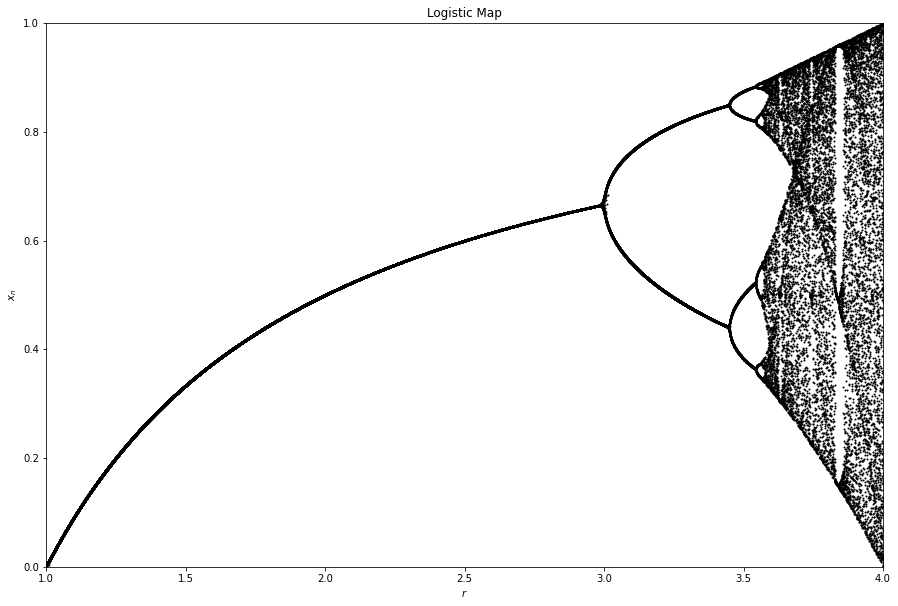

In [2]:
#Plot the logistic map in parametric form (orbit diagram)

plt.figure(figsize=(15, 10))

r_values, x_values = st.logistic_map(100000, 300)

plt.plot(r_values, x_values, 'o', ms = 1, c = 'k')

plt.xlim(1, 4)
plt.ylim(0, 1)

plt.title('Logistic Map')
plt.xlabel(r'$r$')
plt.ylabel(r'$x_n$')

plt.show()

This is the iconic *orbit diagram* representing the cascading bifurcations in the logistic equation leading to chaos.

### Analysis of the Logistic Map (ch. 10.3)

Let's try to find a few of the first bifurcation points $r_n$ analytically.

$x_{n+1} = r x_n \left( 1 - x_n \right)$ where $x^* = 0$ is a fixed point for all $r$.
> Near $x^* = 0$, the map behaves like $x_{n+1} \approx r x_n = r^n x_0 \Rightarrow$ $x^*$ is linearly stable if $r < 1$.

Since the fixed points satisfy $x^* = r x^* \left( 1 - x^* \right)$, the other one is given by $1 = r \left( 1 - x^* \right) \Rightarrow x^* = 1 - \frac{1}{r}$.
> $f \left( x^* \right) = r x^* \left( 1 - x^* \right)$, so $f' \left( x^* \right) = r - 2r x^*$.

> Then $f' \left( 1 - \frac{1}{r} \right) = 2 - r$, so the second fixed point is stable if $|2-r| < 1 \Leftrightarrow 1 < r < 3$.

This result can be explored graphically using the earlier programme used for plotting the logistic equation.
> At $r = 1$ the system undergoes a *transcritical bifurcation* and at $r = 3$ a *flip bifurcation* associated with period doubling.

See **Example 10.3.2** (p. 365–366) for an analysis of the 2-cycle.

**Next Actions**:
- Watch [Lecture 19 – Universal Aspects of Period Doubling](https://www.youtube.com/watch?v=ol6aQcgohxI&list=PLbN57C5Zdl6j_qJA-pARJnKsmROzPnO9V&index=20) (read ch. 10.6 first)
- Do exercises 9.6.3 (synchronised chaos) and 10.3.13 (tantalising patterns)

### Interlude: Graphing the Lorenz Attractor in 3D

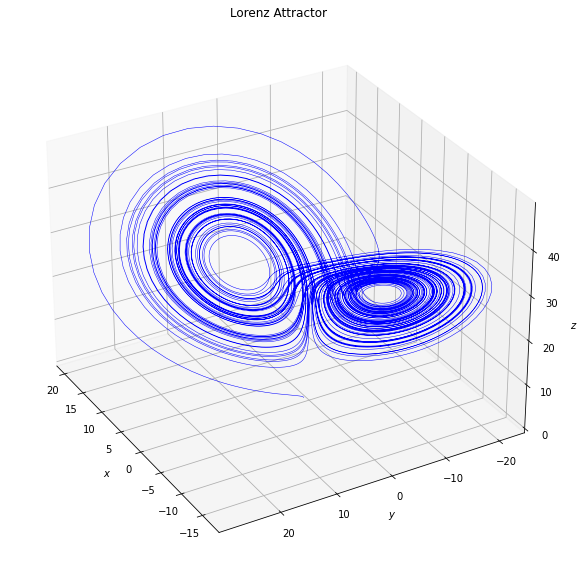

In [22]:
#Format figure for 3D plotting
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')

ax.set_title('Lorenz Attractor')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

#Assign coordinate values from lorenz_values to three lists
x, y, z = st.lorenz_values(28, 10, 6/3, 100)[0]

#Plot the attractor in 3D
ax.plot3D(x, y, z, c = 'b', linewidth = 0.5)

#Adjust viewing angle
ax.view_init(30, 150)

plt.show()

**Exercise 10.3.13** Tantalising Patterns (in the chaotic region of the Logistic map)

Let's plot a zoomed in version of the chaotic region of the orbit diagram.

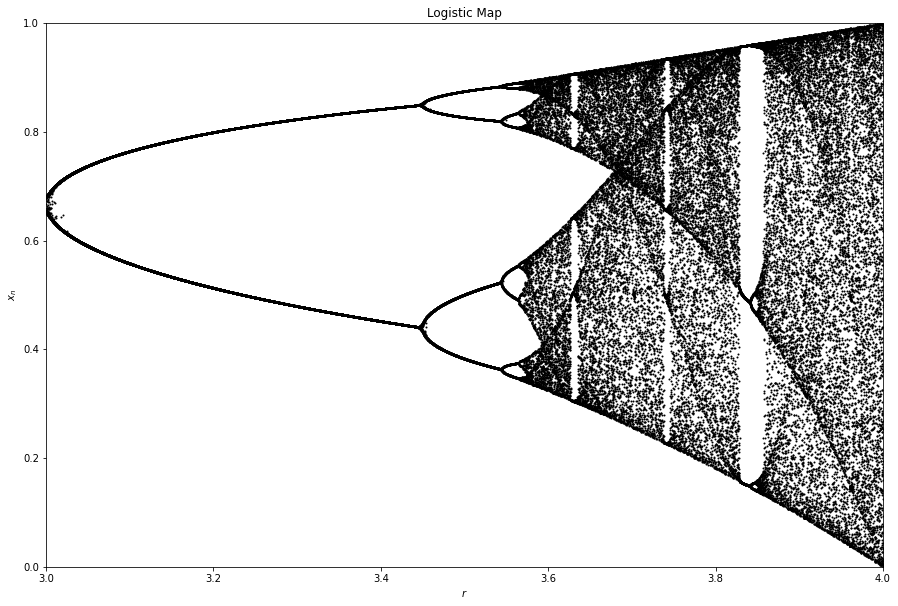

In [2]:
plt.figure(figsize=(15, 10))

r_values, x_values = st.logistic_map(100000, 300, r_lim=[3, 4])

plt.plot(r_values, x_values, 'o', ms = 1, c = 'k')

plt.xlim(3, 4)
plt.ylim(0, 1)

plt.title('Logistic Map')
plt.xlabel(r'$r$')
plt.ylabel(r'$x_n$')

plt.show()

**a)** These supertracks are the result of the first ten or so iterations of the logistic equation with the initial condition $x_m = \frac{1}{2}$ at which the function $f \left( x_m, r \right) = r x_m \left( 1 - x_m \right)$ is maximised. These supertracks are governed by the equations:

$s_0 = \frac{1}{2}$

$s_1 = r s_0 \left( 1 - s_0 \right) = \frac{1}{4} r$

$s_2 = r s_1 \left( 1 - s_1 \right) = \frac{1}{4} r^2 \left( 1 - \frac{1}{4} r \right) = \frac{1}{4} r^2 - \frac{1}{16} r^3$

$s_3 = r s_2 \left( 1 - s_2 \right) = \frac{1}{4} r^3 - \frac{1}{16} r^4 - \frac{1}{16} r^5 + \frac{1}{32} r^6 - \frac{1}{256} r^7$

$s_4 = r s_3 \left( 1 - s_3 \right) = ...$

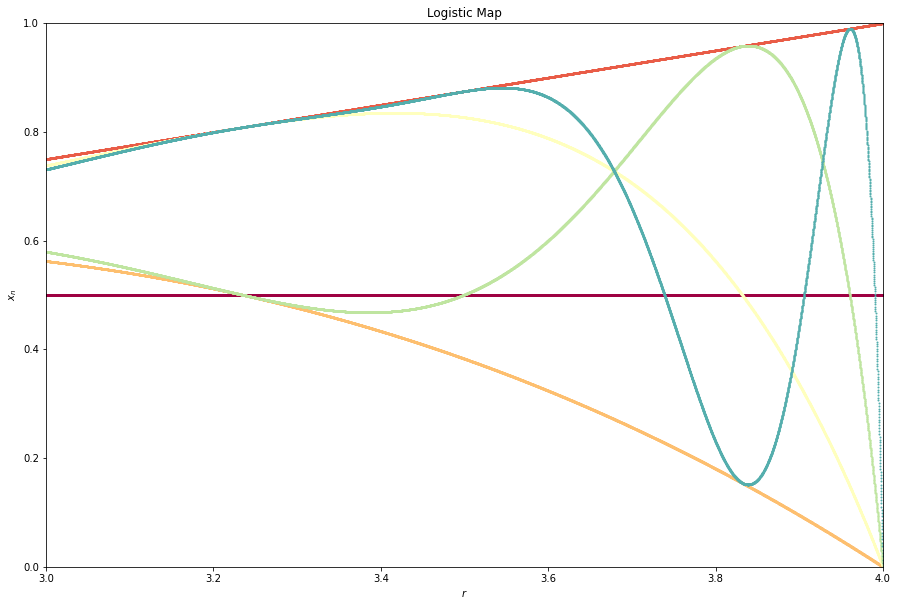

In [37]:
plt.figure(figsize=(15, 10))

cmap = cm.get_cmap('Spectral')

#Plot the supertracks of the logistic map using the initial condition x = 1/2
for n in range(0, 6):
    r_values, x_values = st.logistic_map(10000, n, r_lim=[3, 4], x_input = 0.5)

    plt.plot(r_values, x_values, 'o', ms = 1, c = cmap(n/6))

plt.xlim(3, 4)
plt.ylim(0, 1)

plt.title('Logistic Map')
plt.xlabel(r'$r$')
plt.ylabel(r'$x_n$')

plt.show()

**b)** The supertracks $s_3$, $s_4$ and all higher order $s_i$ intersect at the edge of the "big wedge", i.e. $s_3 = s_4$. We can then solve:

$s_3 = r s_3 \left( 1 - s_3 \right) \Rightarrow 1 = r \left( 1 - s_3 \right) \Rightarrow 1 = r - \frac{1}{4} r^4 + \frac{1}{16} r^5 + \frac{1}{16} r^6 - \frac{1}{32} r^7 + \frac{1}{256} r^8 \Rightarrow r^8 - 8 r^7 + 16 r^6 + 16 r^5 - 64 r^4 + 256 r - 256 = 0$.

Solving this numerically, we get $r = -2$ V $r = 3.6785...$, so (as $r>0$) the value of $r$ at the edge of the big wedge is $r \approx 3.68$.

## Lecture 20 – Universal Aspects of Period Doubling

### Periodic Windows (ch. 10.4)

Zooming in further into the orbit diagram (Exercise 10.3.13) makes the *self-similar* (fractal) nature of the logistic map evident.
> Periodic windows and *supertracks* also become easier to see.

### Universal Aspects of Period Doubling (ch. 10.6–7)

**See**: M. J. Feigenbaum – (1978) *J. Stat. Phys.* **19**, 25 and (1983) *Physica D* **17**, 16.

1) Studied period doubling in various *unimodal* maps of the form $x_{n+1} = r f \left( x_n \right)$.
> Found quantitative laws independent of the precise form of $f(x)$.

2) Connections to statistical physics:
> a) Analogy to *universal exponents* found in 2nd-order phase transitions, e.g. magents, fluids, superfluids.

> b) Feigenbaum used *renormalisation* to explain this universality.

3) Predictions about the route to chaos confirmed in later experiments on fluids, chemical oscillations, semiconductors etc.

#### Computer Experiment

Consider the (transcendental) sine map $f(x) = r \sin{\pi x}$ where $x \in \left[0, 1 \right]$.
> The resulting orbit diagram is remarkably similar to the logistic map (p. 378).

The specific bifurcation points $r_n$ depend on $f(x)$, but the limit $\delta = \lim\limits_{n \to \infty}{ \frac{r_n - r_{n-1}}{r_{n+1} - r_n}} = 4.6692...$ remains the same.
> The $r$-direction scaling factor $\delta$ is referred to as *Feigenbaum's constant*.

There is also universal scaling in the $x$-direction $\Rightarrow$ scaling constant $\alpha = \lim\limits_{n \to \infty} \frac{d_n}{d_{n+1}} = -2.5029...$ (p. 380).

**Next Actions**:
- ~Finish Exercise 10.3.13~
- ~Begin Week 7 Jupyter Notebook~
- ~Read *The Misbehaviour of Markets* $\to$ p. 225~